# Исследование объявлений о продаже квартир

## Навигация

1. [Описание проекта](#Описание-проекта)
1. [Изучение данных](#Изучение-данных)
   - [Общая информация о датасете](#Общая-информация-о-датасете)
1. [Описание данных](#Описание-данных)
   - [Промежуточный вывод](#Промежуточный-вывод)
3. [Предобработка данных](#Предобработка-данных)
   - [Обработка дубликатов в названии населённых пунктов](#Обработка-дубликатов-в-названии-населённых-пунктов)
   - [Изменение типов данных](#Изменение-типов-данных)
   - [Устранение выбивающихся значенний](#Устранение-выбивающихся-значенний)
   - [Устранение редких и выбивающихся значений](#Устранение-редких-и-выбивающихся-значений)
1. [Расчёты и добавление результатов в таблицу](#Расчёты-и-добавление-результатов-в-таблицу)
1. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
   - [Изучим факторы, которые влияют на стоимость квартиры](#Изучим-факторы-которые-влияют-на-стоимость-квартиры)
9. [Общий вывод](#Общий-вывод)

## Описание проекта
[к навигации](#Навигация)

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных

In [3]:
# Импортируем необходимые библиотеки для исследования
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данные:

In [4]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

### _Общая информация о датасете_


In [5]:
df.head(7) # Просмотр первых 7 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в таблице 22 столбца.
* 2 столбца типа `bool`
* 14 столбцов типа `float64`
* 3 столбца типа `int64`
* 3 столбца типа `object` 


Согласно документации к данным:
## Описание данных

[к навигации](#Навигация)

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


В названиях колонок нарушения стиля не выяалены


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


Построим диаграммы для наглядного представления изначальных данных

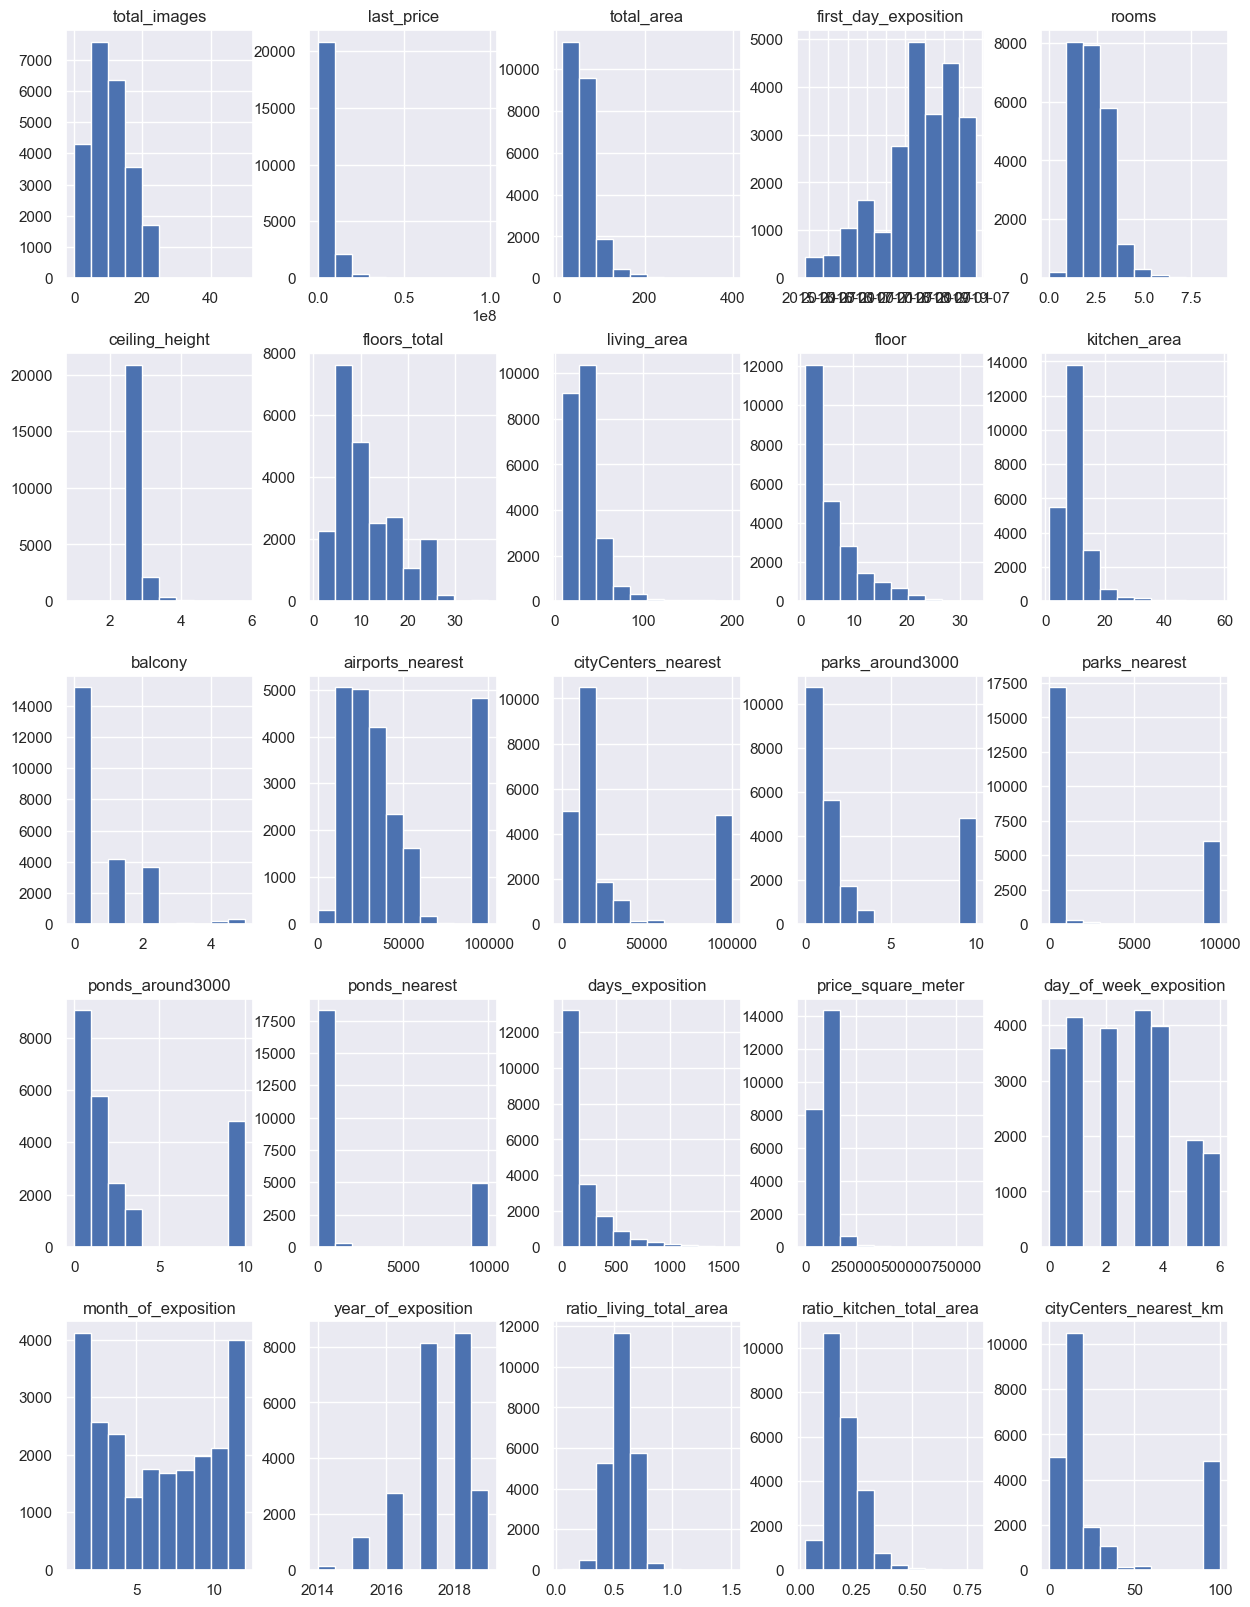

In [298]:
sns.set(style='darkgrid', rc={'figure.figsize':(15, 10)})
df.hist(figsize=(15, 20))
plt.show()

### _Промежуточный вывод_

Был прочитан исходный датасет, а также изучена общая информация о нём: колонки, количество записей, типы данных, числовое описание данных, были построены общие гистограммы по столбцам.
Можно отметить:
- Названя колонок датафрейма корректное
- Данные не содержат явных дубликатов
- В данных имеются пропуски
- Типы данных некоторых столбцов не соответсвуют самим данным
- Судя по гистограммам и данным во многих столбцах присутствуют явно выбивающиеся значения
  

## Предобработка данных

[к навигации](#Навигация)

_Определим в каких столбах есть пропущенные значения_


In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видно, что некоторые колонки содержат очень большое количество пропусков, к таким можно отнести колонки `ceiling_height`, `is_apartment`, `balcony`, `parks_nearest`, `ponds_nearest`

В этом случае пропуски могут сильно повлиять на корректный резултат исследования, поэтому важно их заполнить или удалить

In [10]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заполним пропуски в столбце `ceiling_height` медианными значениямии, так как в числовом описании видно, что есть число данных, которые явно выбиваются (высота потолка 100 или же 1)

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [13]:
df['ceiling_height'].isna().sum() # Проверка на то что пропусков больше нет

np.int64(0)

In [14]:
print(f'Доля пропусков в колонке floors_total {df['floors_total'].isna().mean():.2%}')

Доля пропусков в колонке floors_total 0.36%


Пропущенные значения в колонке floors_total составляют всего 0.36% от общего количества записей, это несущественное количество, которое вряд ли повлияет на дальнейшее исследование. 
Заменим пропуски на значение колонки `floor`, так как это означает что в доме точно будет столько этажей.


In [15]:
# df['floors_total'].fillna(df['floor'], inplace=True)
df.loc[df['floors_total'].isna(), 'floors_total'] = df['floor']

In [16]:
df['floors_total'].isna().sum() # Проверка на то что пропусков больше нет

np.int64(0)

In [17]:
print(f'Доля пропусков в колонке living_area {df['living_area'].isna().mean():.2%}')

Доля пропусков в колонке living_area 8.03%


Пропуски в колонке living_area будем заполнять медианным значениям по типу квартир с таким же количеством комнат

In [18]:
df['living_area'] = df['living_area'].fillna(df[['rooms', 'living_area']]
                                             .groupby(by='rooms')['living_area']
                                             .transform('median'))

In [19]:
df['living_area'].isna().sum() # Проверка на то что пропусков больше нет

np.int64(0)

In [20]:
print(f'Доля пропусков в колонке is_apartment {df['is_apartment'].isna().mean():.2%}')

Доля пропусков в колонке is_apartment 88.29%


Колонка is_apartment имеет самый большой процент пропусков во всей таблице

In [21]:
df['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

In [22]:
df['rooms']

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23699, dtype: int64

Существует 197 квартир у которух указано 0 комнат, следовательно их монжо отнести к классу аппартаментов, остальные же отнесём к классу обычных квартир

In [23]:
df['is_apartment'] = df['is_apartment'].where(df['is_apartment'].notna(), df['rooms'] == 0)

In [24]:
df['is_apartment'].value_counts()# Проверка на то что пропусков больше нет

is_apartment
False    23458
True       241
Name: count, dtype: int64

In [25]:
print(f'Доля пропусков в колонке kitchen_area {df['kitchen_area'].isna().mean():.2%}')

Доля пропусков в колонке kitchen_area 9.61%


Заполним пропуски медианной

In [26]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [27]:
df['kitchen_area'].isna().sum() # Проверка на то что пропусков больше нет

np.int64(0)

In [28]:
print(f'Доля пропусков в колонке balcony {df['balcony'].isna().mean():.2%}')

Доля пропусков в колонке balcony 48.61%


Заменим пропуски в столбце балконов на 0

In [29]:
df['balcony'] = df['balcony'].fillna(0)

In [30]:
df['balcony'].isna().sum() # Проверка на то что пропусков больше нет

np.int64(0)

In [31]:
print(f'Доля пропусков в колонке locality_name {df['locality_name'].isna().mean():.2%}')

Доля пропусков в колонке locality_name 0.21%


Заменим на Санкт-Петербург для в пределах 10000 км от центра 

In [32]:
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] < 10000), 'locality_name'] = 'Санкт-Петербург'
df['locality_name'] = df['locality_name'].fillna('не указано')

In [33]:
df['locality_name'].isna().sum() # Проверка на то что пропусков больше нет

np.int64(0)

Прежде чем двигаться дальше надо удалить невные дубликаты в столбце `locality_name`

### _Обработка дубликатов в названии населённых пунктов_

In [34]:
# выведем количество уникальных названий и сами названия
print(df['locality_name'].nunique())
df['locality_name'].unique()

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

некоторые названия отличаются только буквой __е__ и __ё__ в названии. 
Заменим буквы ё на буквы е


In [35]:
df['locality_name'] = df['locality_name'].replace('ё', 'е', regex=True)

In [36]:
print(df['locality_name'].nunique())

331


Далее уберём все дополнительные значения обозначения наседённых пунктов, оставим только названия. 

In [40]:
replacement_list = [
    'поселок',
    'станции',
    'село',
    'деревня',
    'городской поселок',
    'коттеджный поселок',
    ' городского типа ',
    'при железнодорожной станции',
    'садовое товарищество',
    'садоводческое некоммерческое товарищество ',
    'городской  ',
    'при железнодорожной '
]
df['locality_name'] = df['locality_name'].replace(replacement_list, '', regex=True)
df['locality_name'] = df['locality_name'].apply(lambda s: s.strip())

In [43]:
print(df['locality_name'].nunique())
df['locality_name'].isna().sum()

307


np.int64(0)

In [44]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Удалось избавиться от 56 повторяющихся названий


Теперь можно заполнить оставшиеся пропуски

In [45]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [46]:
print(f'Доля пропусков в колонке airports_nearest {df['airports_nearest'].isna().mean():.2%}')
print(f'Доля пропусков в колонке cityCenters_nearest {df['cityCenters_nearest'].isna().mean():.2%}')

Доля пропусков в колонке airports_nearest 23.38%
Доля пропусков в колонке cityCenters_nearest 23.29%


Заменим пропуски на медианное значение для определённых населённых пунктов


In [47]:
df['airports_nearest'] = df['airports_nearest'].fillna(df[['locality_name', 'airports_nearest']]
                                             .groupby(by='locality_name')['airports_nearest']
                                             .transform('median'))

df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df[['locality_name', 'cityCenters_nearest']]
                                             .groupby(by='locality_name')['cityCenters_nearest']
                                             .transform('median'))

In [48]:
print(df['airports_nearest'].isna().sum()) # Проверка на то что пропусков больше нет
print(df['cityCenters_nearest'].isna().sum()) 

4829
4829


In [49]:
df.loc[(df['airports_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,9.1,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.65,5.0,30.0,5,False,...,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,False,...,11.0,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,17.6,2,False,...,9.1,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.5,1,False,...,9.1,0.0,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,False,...,5.5,0.0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,2.65,5.0,17.5,4,False,...,6.0,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,9.1,0.0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видимо для данных населённых пунктов расстояния до аэропорта и центра города слишком большое, поэтому поставим нейтральне 100км


In [50]:
df['airports_nearest'] = df['airports_nearest'].fillna(100000)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(100000)
print(df['airports_nearest'].isna().sum()) # Проверка на то что пропусков больше нет
print(df['cityCenters_nearest'].isna().sum()) 

0
0


In [51]:
# для каждого населённого пункта найдём медианное значение 'parks_around3000' и заменим пропущенные значения
df['parks_around3000'] = df['parks_around3000'].fillna(
    df[['locality_name', 'parks_around3000']]
    .groupby(['locality_name'])['parks_around3000']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'parks_nearest' и заменим пропущенные значения
df['parks_nearest'] = df['parks_nearest'].fillna(
    df[['locality_name', 'parks_nearest']]
    .groupby(['locality_name'])['parks_nearest']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'ponds_around3000' и заменим пропущенные значения
df['ponds_around3000'] = df['ponds_around3000'].fillna(
    df[['locality_name', 'ponds_around3000']]
    .groupby(['locality_name'])['ponds_around3000']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'ponds_nearest' и заменим пропущенные значения
df['ponds_nearest'] = df['ponds_nearest'].fillna(
    df[['locality_name', 'ponds_nearest']]
    .groupby(['locality_name'])['ponds_nearest']
    .transform('median'))
# заменим оставшиеся пропуски в 'parks_around3000' и 'ponds_around3000' на 10
df.loc[df['parks_around3000'].isna(), 'parks_around3000'] = 10
df.loc[df['ponds_around3000'].isna(), 'ponds_around3000'] = 10
# заменим оставшиеся пропуски в 'parks_nearest' и 'ponds_nearest' на 10000
df.loc[df['parks_nearest'].isna(), 'parks_nearest'] = 10000
df.loc[df['ponds_nearest'].isna(), 'ponds_nearest'] = 10000

In [204]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [52]:
print(f'Доля пропусков в колонке days_exposition {df['days_exposition'].isna().mean():.2%}')

Доля пропусков в колонке days_exposition 13.42%


Остался последний столбец days_exposition (_сколько дней было размещено объявление_). Возможно эти обявления находились меньше одного дня. Пока оставим этот столбец без изменений

### _Изменение типов данных_

[к навигации](#Навигация)

Рассмотрим некоторые стобцы с данными, которые имеют несоответствующий тип данных <\n>

- `first_day_exposition` - 'object', должен быть 'datetime64'
- `floors_total` - 'float64', количество этажей в доме целое число 'int64'
- `is_apartment` - 'object', должен быть булев тип 'bool'
- `balcony` - 'float64', число балконов 'int64'
- `parks_around3000` - 'float64', должно быть целое число 'int64'
- `ponds_around3000` - 'float64', должно быть целое число 'int64'
- `days_exposition` - 'float64', должно быть целое число 'int64'


In [53]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],
                                           format='%Y-%m-%dT%H:%M:%S')
columns_to_int_list = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']

for column in columns_to_int_list:
    df[column] = df[column].astype('int64', errors='ignore')
df['is_apartment'] = df['is_apartment'].astype('bool', errors='ignore')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### _Устранение выбивающихся значенний_

[к навигации](#Навигация)

Проанализируем значения и удалим самые выбивающиеся записи


In [99]:
# Удаляем записи с ценой квартиры больше 100 миллионов
df = df.query('last_price < 100000000')
# Удаляем записи с общей площадью квартиры более 400 кв.м
df = df.query('total_area < 400')
# Удаляем записи квартир с количеством комнат больше 10
df = df.query('rooms < 10')
# Удаляем записи квартир высотой потолков больше 6 м 
df = df.query('ceiling_height < 6')
# Удаляем данные с домами, в которых больше 38 этажей 
df = df.query('floors_total <= 38')
# Удаляем данные с жилой площадью меньше 7 кв. м 
df = df.query('living_area >= 7')
# Удаляем данные с жилой площадью меньше 13 кв. м и количеством комнат больше 1
df = df.query('living_area >= 13 or (living_area <13 and rooms < 2)')
# Удаляем записи квртир с жилой площадью более 200 кв. м
df = df.query('living_area <= 200')
# Удаляем записи квртир с площадью кухни более 60 кв. м
df = df.query('kitchen_area < 60')

Было удалено порядка 110 записей, что составляет менне 0.5% от исходных данных.

Предобработка данных завершена и можно переходить к дальнейшим исследованиям

## Расчёты и добавление результатов в таблицу

[к навигации](#Навигация)

 - ___Посчитаем цену одного квадратного метра___

In [55]:
df['price_square_meter'] = df['last_price'] / df['total_area']

 - ___Определим день недели, месяц и год публикации объявления___

In [56]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_of_exposition'] = df['first_day_exposition'].dt.month
df['year_of_exposition'] = df['first_day_exposition'].dt.year

 - ___Определим этаж квратиры (первый, последний, другой)___

In [57]:
def define_floor_of_aparts(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


In [58]:
df['apartament_type'] = df.apply(define_floor_of_aparts, axis=1)

- ___Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей___

In [59]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,apartament_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,10000.0,0,584.5,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой


In [60]:
df['ratio_living_total_area'] = df['living_area'] / df['total_area']
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area']

In [61]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,apartament_type,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,584.5,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

[к навигации](#Навигация)

Изучим следующие параметры: площадь, цена, число комнат, высота потолков, также построим гистограммы для каждого параметра из перечисленных


Напишем функцию которая будет выводить переданные ей параметры в порядке убывания, а также строить гистограмму по полученным значениям


In [74]:
def column_info(column, bins, rangeX, title, label):
    plt.hist(df[column], bins=bins, range=rangeX)
    plt.title(title, fontsize=18)
    plt.xlabel(label, color='gray')
    plt.ylabel('количество квартир', color='gray')
    plt.show()

    display(df[column].value_counts().reset_index())

    display(df[column].describe())
    return
    

- ___Площадь квартиры___

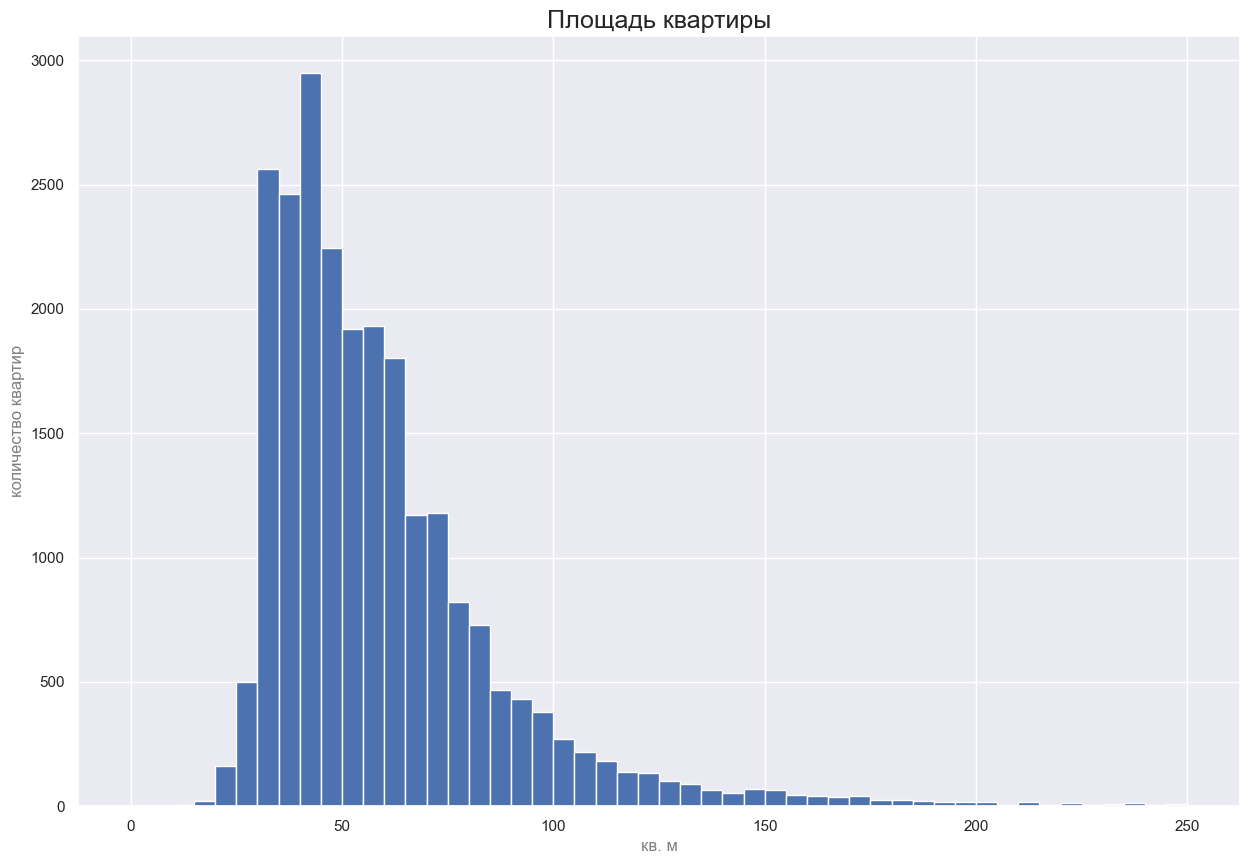

,total_area,count
0,45.00,414
1,42.00,381
2,60.00,346
3,31.00,345
4,44.00,344
...,...,...
2117,167.10,1
2118,231.20,1
2119,43.85,1
2120,37.82,1


count    23557.000000
mean        59.407517
std         30.871354
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        399.000000
Name: total_area, dtype: float64

In [101]:
column_info('total_area', bins=50, rangeX=(0, 250), 
           title='Площадь квартиры', label='кв. м')

Можно увидеть распределение Пуассона с пиком квартир площадью 45 кв. м

- ___Жилая площадь___

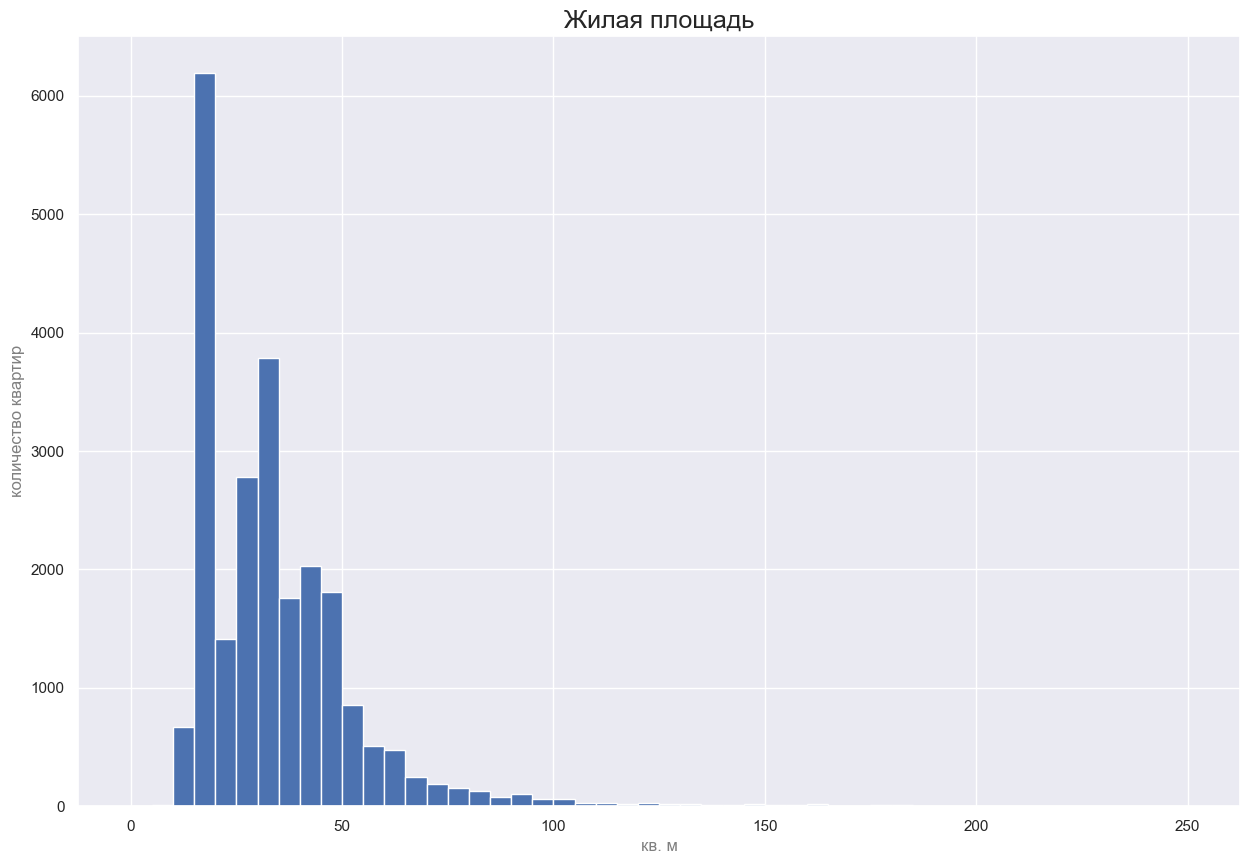

,living_area,count
0,18.00,896
1,17.60,754
2,30.50,710
3,17.00,673
4,45.00,595
...,...,...
1727,27.05,1
1728,183.70,1
1729,18.46,1
1730,35.81,1


count    23557.000000
mean        33.856913
std         19.416667
min          8.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        200.000000
Name: living_area, dtype: float64

In [102]:
column_info('living_area', bins=50, rangeX=(0, 250), 
           title='Жилая площадь', label='кв. м')

Можно увидеть два характерных пика. Пик около 30 - заполнение неизвестных значений медианными. Самая распространённая жилая площадь порядка 17-18 кв. м, а вот между пиками надлюдается провал значений.

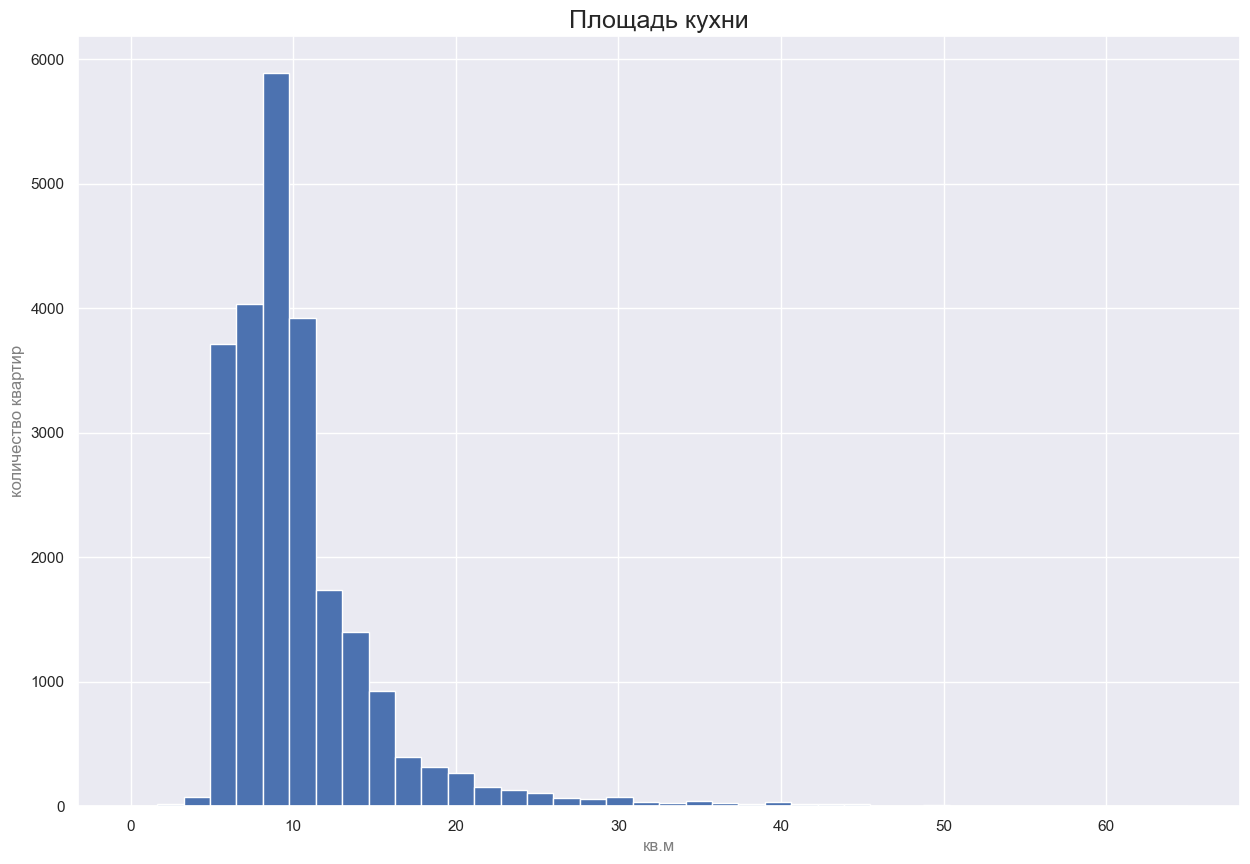

,kitchen_area,count
0,9.10,2342
1,6.00,1299
2,10.00,1261
3,8.00,1107
4,9.00,1097
...,...,...
941,4.30,1
942,39.90,1
943,18.55,1
944,21.55,1


count    23557.000000
mean        10.306883
std          5.054987
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max         58.400000
Name: kitchen_area, dtype: float64

In [110]:
column_info('kitchen_area', bins=40, rangeX=(0, 65),
           title='Площадь кухни', label='кв.м')

Получилось классическое распределение Пуассона с пиком около 9 кв.м

- ___Распределение цен___

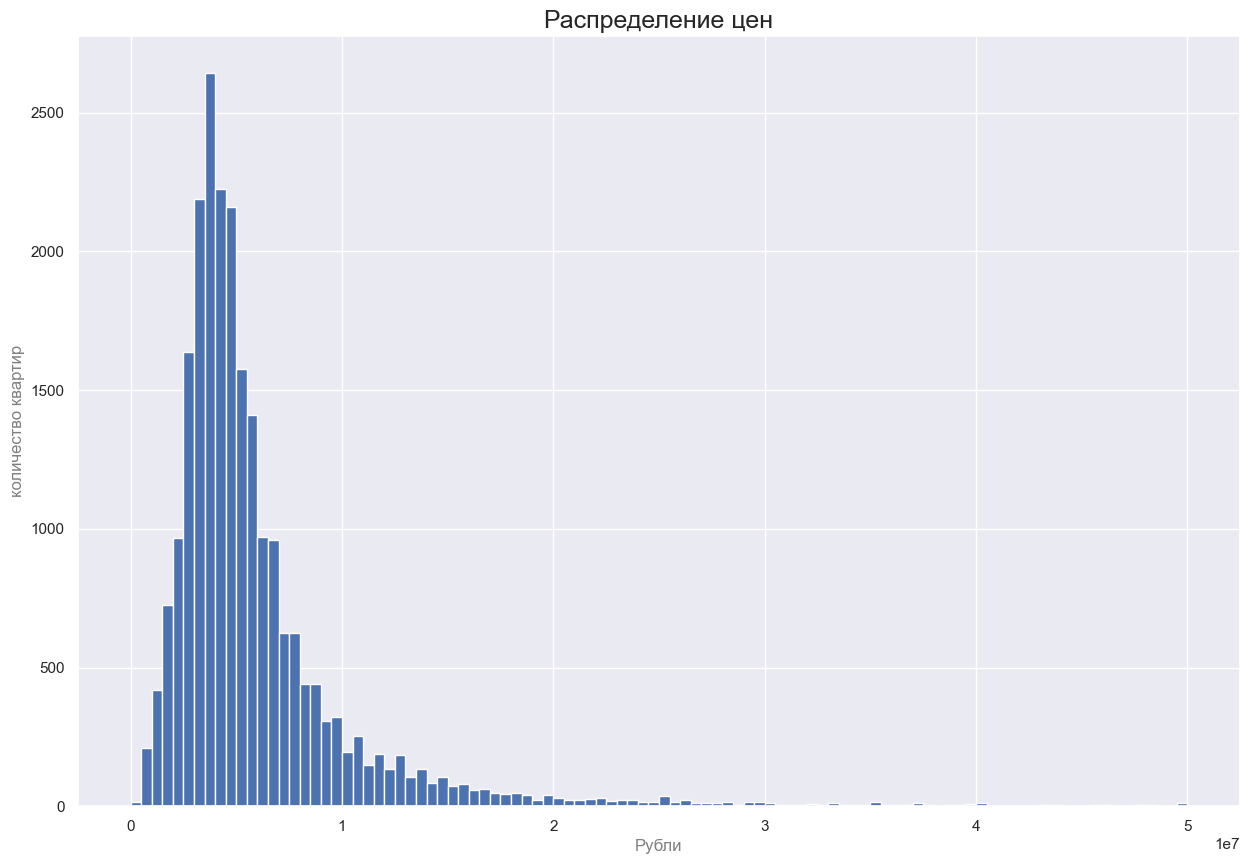

,last_price,count
0,4500000.0,342
1,3500000.0,291
2,4300000.0,259
3,4000000.0,259
4,4200000.0,258
...,...,...
2920,21400000.0,1
2921,34400000.0,1
2922,7515162.0,1
2923,7915000.0,1


count    2.355700e+04
mean     6.167332e+06
std      6.046313e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

In [111]:
column_info('last_price', bins=100, rangeX=(0, 50000000),
           title='Распределение цен', label='Рубли')

Цена продаваемых квартир подчиняется классическому распределению Пуассона с пиком при цене 4,5 млн. рублей. В этом ценовом диапазоне лежат самые многочисленные предложения

- ___Число комнат___ 

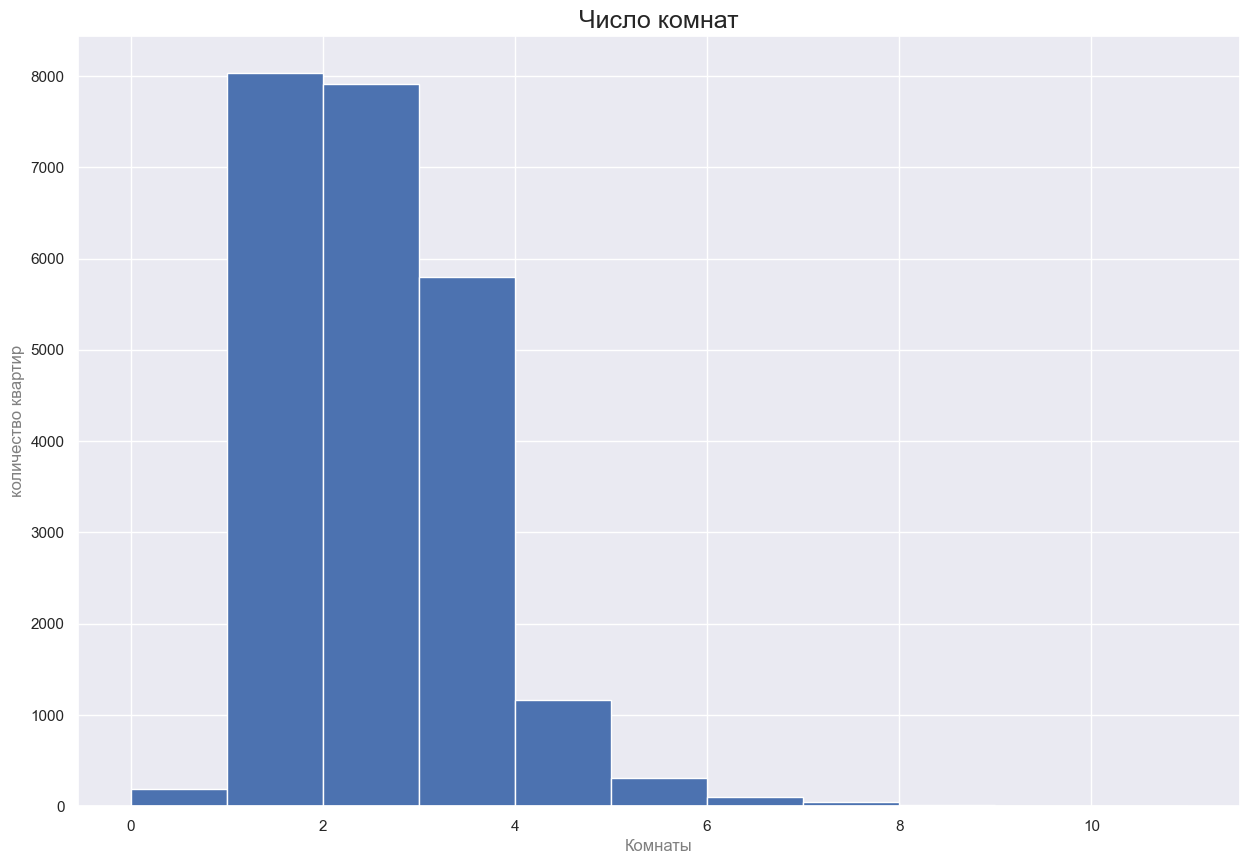

,rooms,count
0,1,8033
1,2,7908
2,3,5793
3,4,1163
4,5,308
5,0,194
6,6,98
7,7,44
8,8,10
9,9,6


count    23557.000000
mean         2.056714
std          1.035788
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

In [119]:
column_info('rooms', bins=11, rangeX=(0, 11),
           title='Число комнат', label='Комнаты')

Самые частоподаваемые квартиры - "однушки" (8042 объявления), низкая стоимость вхождения во владельца недвижимости привлекает потенциальных покупателей, также много объявлений о продаже 2-комнатных квартир (7929 объявлений) и 3-комнатных (5799 объявлений). Больше 3-х комнат имеет всего 1600 объявлений. Удивительно, что студий очень мало - всего 195 объявлений.

- ___Высота потолков___

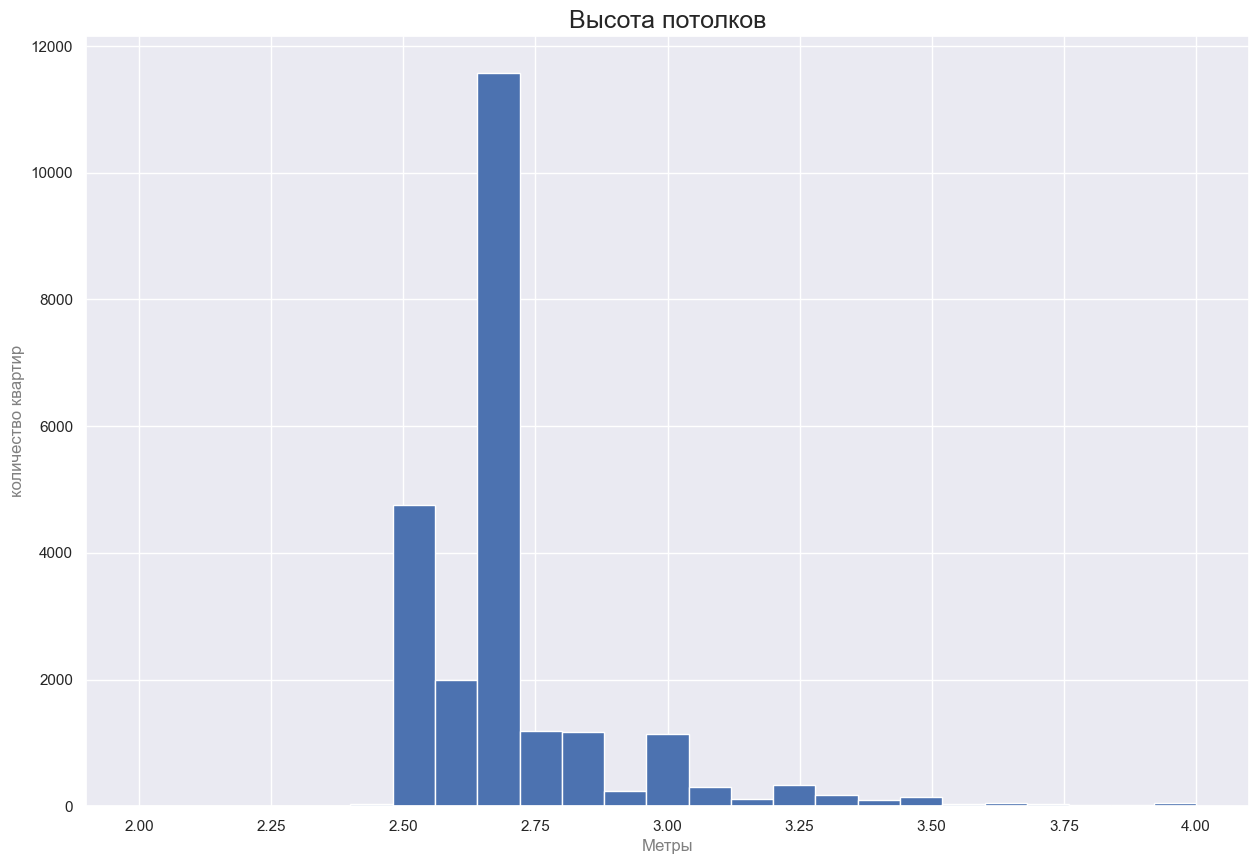

,ceiling_height,count
0,2.65,9835
1,2.50,3508
2,2.60,1644
3,2.70,1570
4,3.00,1103
...,...,...
160,5.80,1
161,2.49,1
162,3.48,1
163,1.00,1


count    23557.000000
mean         2.694669
std          0.215618
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

In [131]:
column_info('ceiling_height', bins=25, rangeX=(2, 4), 
            title='Высота потолков', label='Метры')

Самая популярная высота потолков в Санкт-Петербурге 2.65 м. Также много квартир с потолками в 2.5 м.

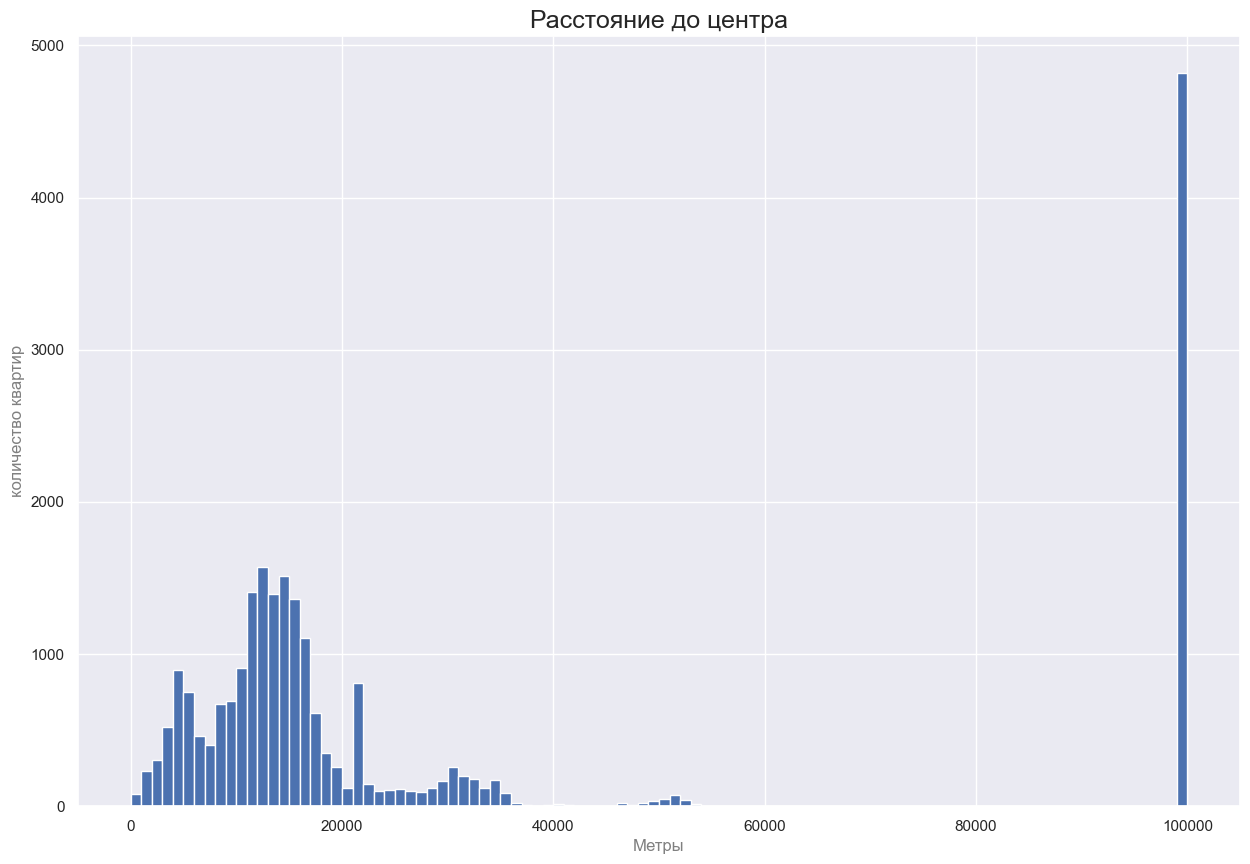

,cityCenters_nearest,count
0,100000.0,4819
1,21888.0,586
2,12241.0,63
3,8460.0,61
4,17369.0,32
...,...,...
7596,1225.0,1
7597,1463.0,1
7598,19140.0,1
7599,14494.0,1


count     23557.000000
mean      31986.830475
std       35331.459597
min         181.000000
25%       10977.000000
50%       14977.000000
75%       31101.000000
max      100000.000000
Name: cityCenters_nearest, dtype: float64

In [133]:
column_info('cityCenters_nearest', bins=100, rangeX=(0, 100000),
           title='Расстояние до центра', label='Метры')

__Изучим время продажи квартиры__ 

Для получение более точных данных мы не будем учитывать пропуски.

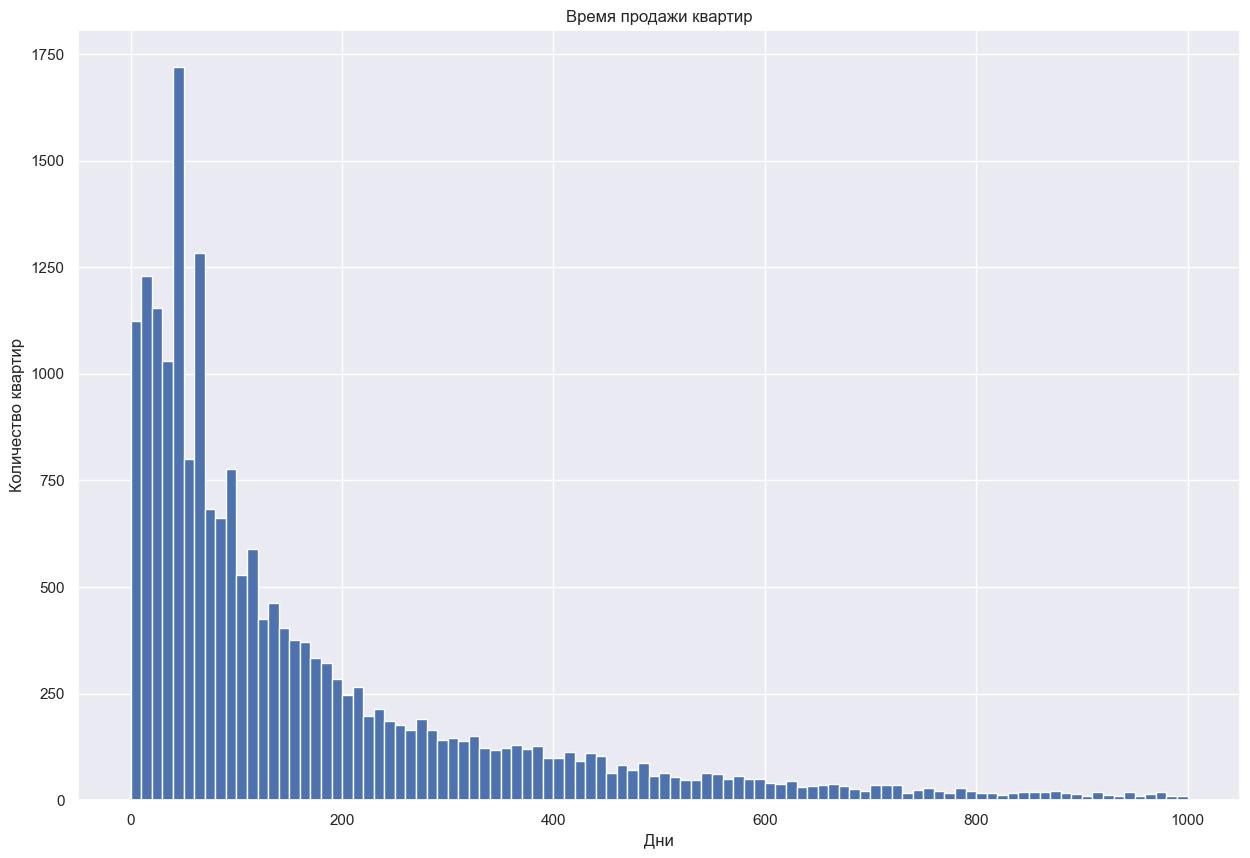

,days_exposition,count
0,45.0,878
1,60.0,538
2,7.0,232
3,30.0,208
4,90.0,204
...,...,...
1134,1006.0,1
1135,1252.0,1
1136,1360.0,1
1137,1007.0,1


count    20401.000000
mean       180.485711
std        219.343749
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [154]:
plt.hist(df.loc[~df['days_exposition'].isna(), 'days_exposition'], bins=100, range=(0,1000))
plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# посчитаем количество значений в порядке убвыния
display(df['days_exposition'].value_counts().reset_index())
# получим числовое описание о днях размещения
display(df['days_exposition'].describe())

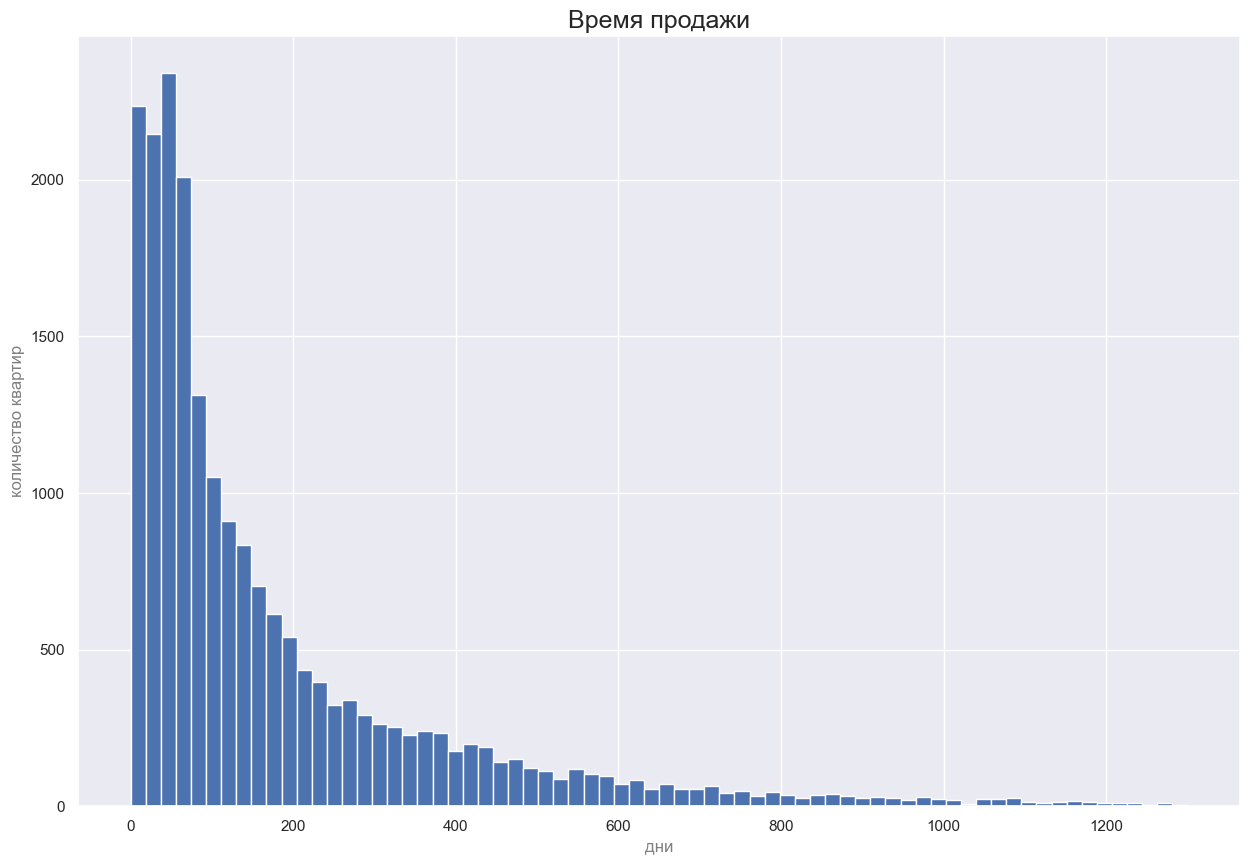

,days_exposition,count
0,45.0,878
1,60.0,538
2,7.0,232
3,30.0,208
4,90.0,204
...,...,...
1134,1006.0,1
1135,1252.0,1
1136,1360.0,1
1137,1007.0,1


count    20401.000000
mean       180.485711
std        219.343749
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [139]:
column_info('days_exposition', bins=70, rangeX=(0, 1300),
           title='Время продажи', label='дни')

Медианное значение продажи квартир 95 дней, логично предположить, что квартиры, проданные ранее этого срока это быстрые продажи. Примечательно, что максимальное количество продаж (эти продажи даже выделяются на общем фоне) в количестве 878 произошло за 45 дней и 538 за 60 дней, т.е. очень быстро. К необычно долгим продажам можно отнести сделки, совершённые за третим квартилем (за порогом в 75% от совершённых сделок), т.е. продажи, которые длились больше 231 дня. Самая долгая продажа длилась 1580 дней, то есть более 4 лет.

### _Изучим факторы, которые влияют на стоимость квартиры_

[к навигации](#Навигация)

Построим корреляционную тепловую карту

In [172]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,apartament_type,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,584.5,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


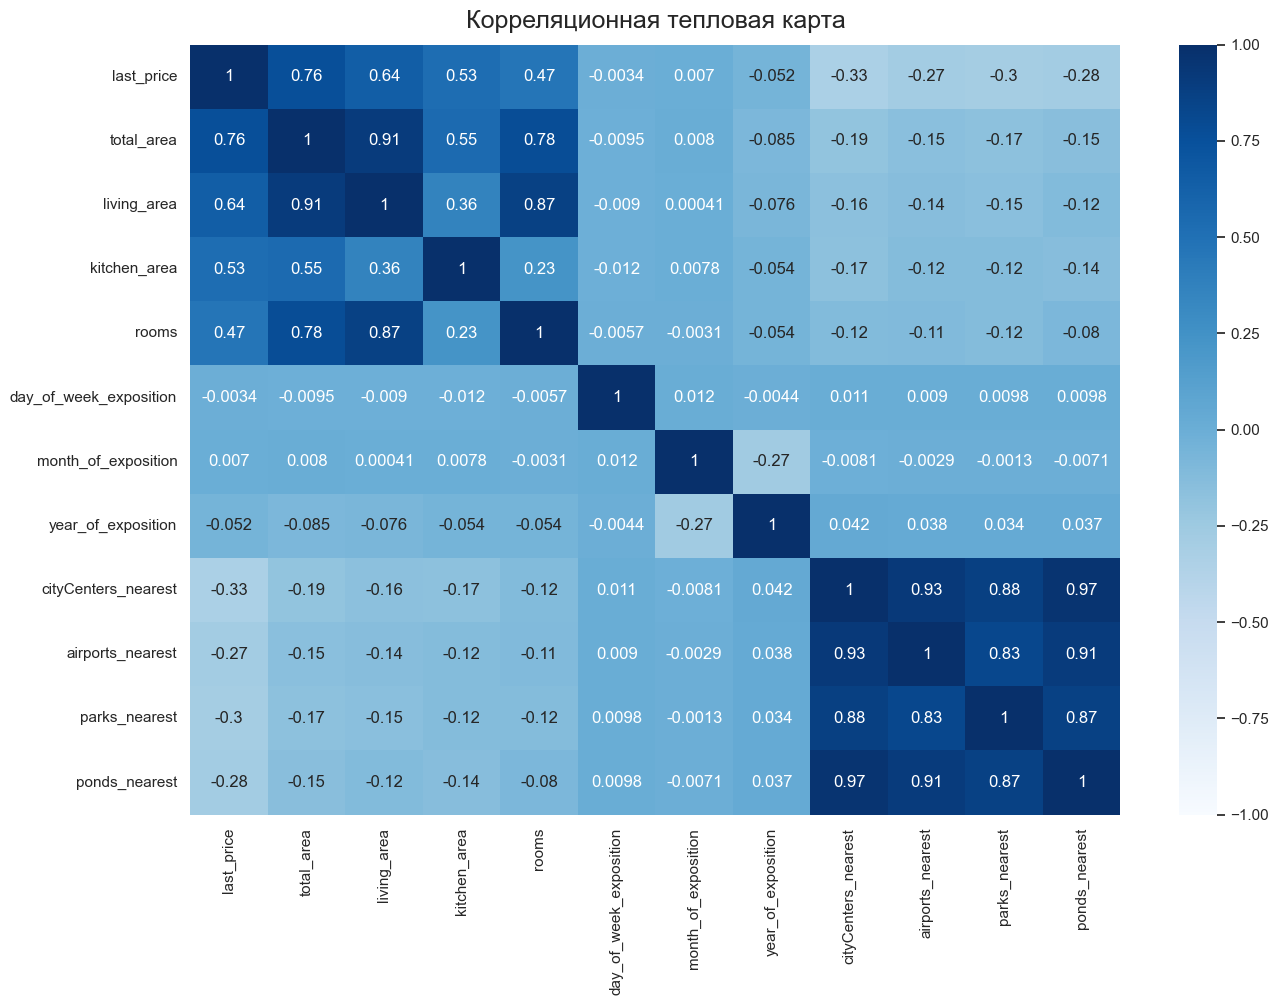

In [186]:
# создадим список из интересующих нас для анализа столбцов
corr_columns = ['last_price', 'total_area', 'living_area', 
                'kitchen_area', 'rooms', 'day_of_week_exposition',
                'month_of_exposition', 'year_of_exposition', 'cityCenters_nearest',
                'airports_nearest', 'parks_nearest', 'ponds_nearest']

heatmap = sns.heatmap(df[corr_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Корреляционная тепловая карта', fontdict={'fontsize':18}, pad=12)
plt.show()

Видно, что на стоимость больше всего оказывает влияние общая площадь квартиры. Такие параметры как жилая площадь, площадь кухни и количество комнат, больше зависят от жилой площади, но всё же оказывают косвенное влияние на стоимость квартиры. Временные факторы никак не коррелируют со стоимостью. Расстояние до аэропорта, ближайшего парка и водоёма имеют небольшую отрицательную корреляцию, это означает, что чем ближе квартира располагается определённой инфпаструктуре, тем дороже стоимость.

Тем не менее, рассмотрим на отдельных графиках зависиомсти от этих параметров.


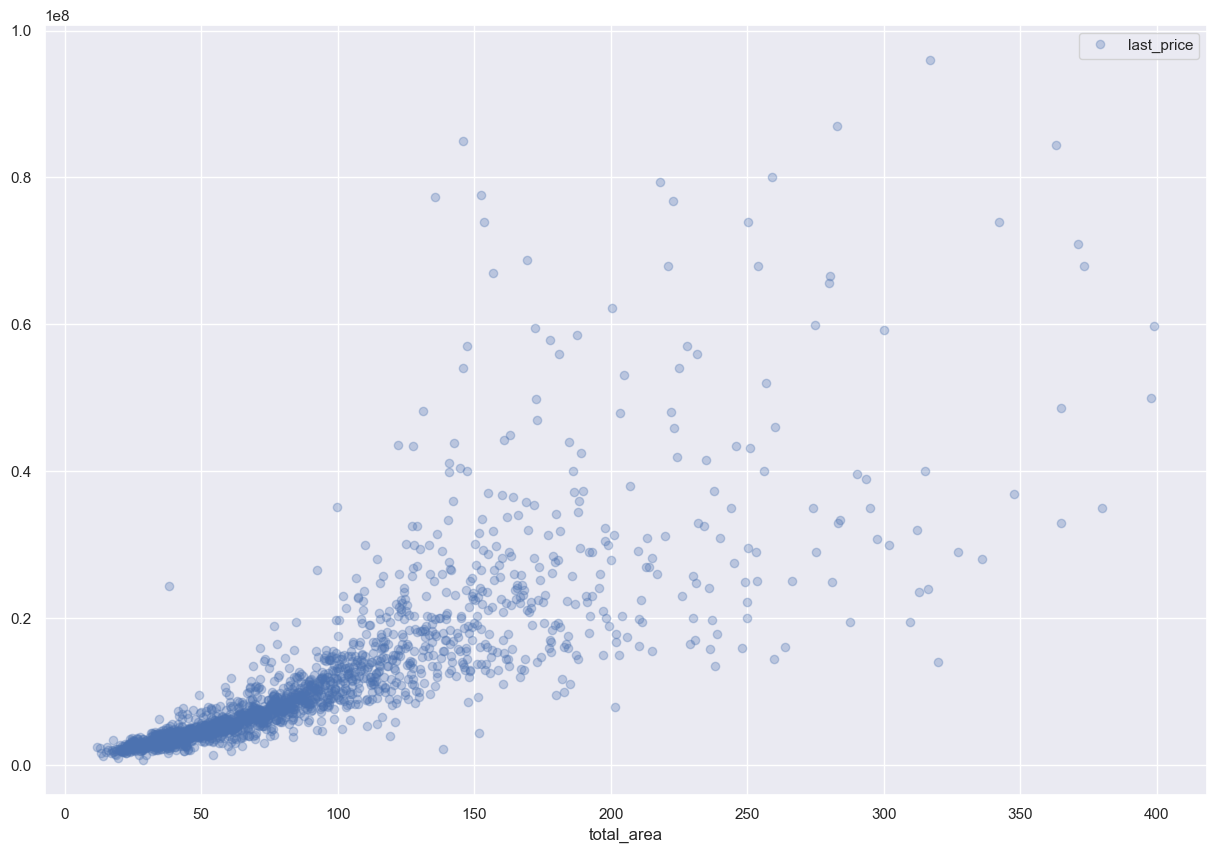

In [188]:
df.pivot_table(index='total_area', values='last_price').plot(style='o', alpha=0.3)
plt.show()

Видно тесную зависимость цены от площади, особенно на площадях до 270 кв.м и стоимостью до 30 млн., дальше наблюдается разброс значений.

- Жилая площадь

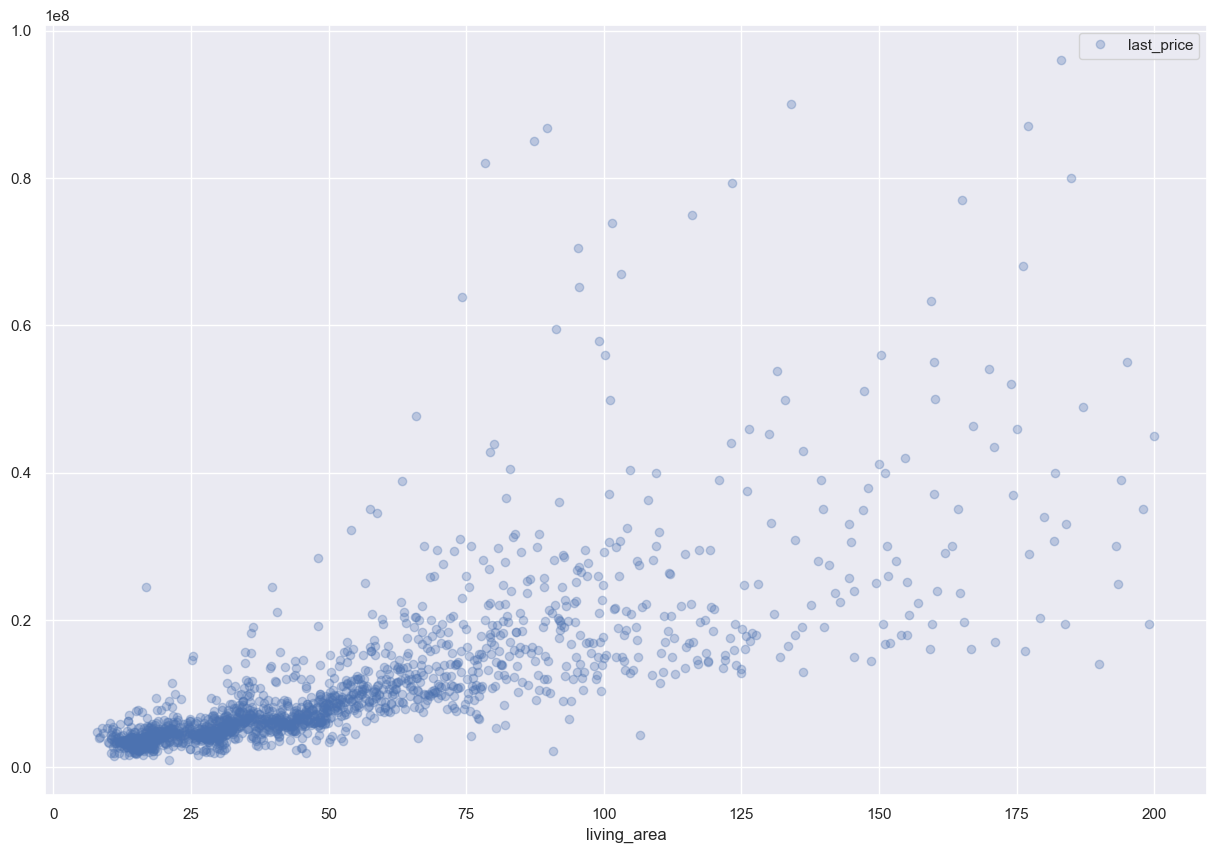

In [193]:
df.pivot_table(index='living_area', values='last_price').plot(style='o', alpha=0.3)
plt.show()

Тоже есть определённая зависимость до стоимости в 40 млн.

- Площадь кухни

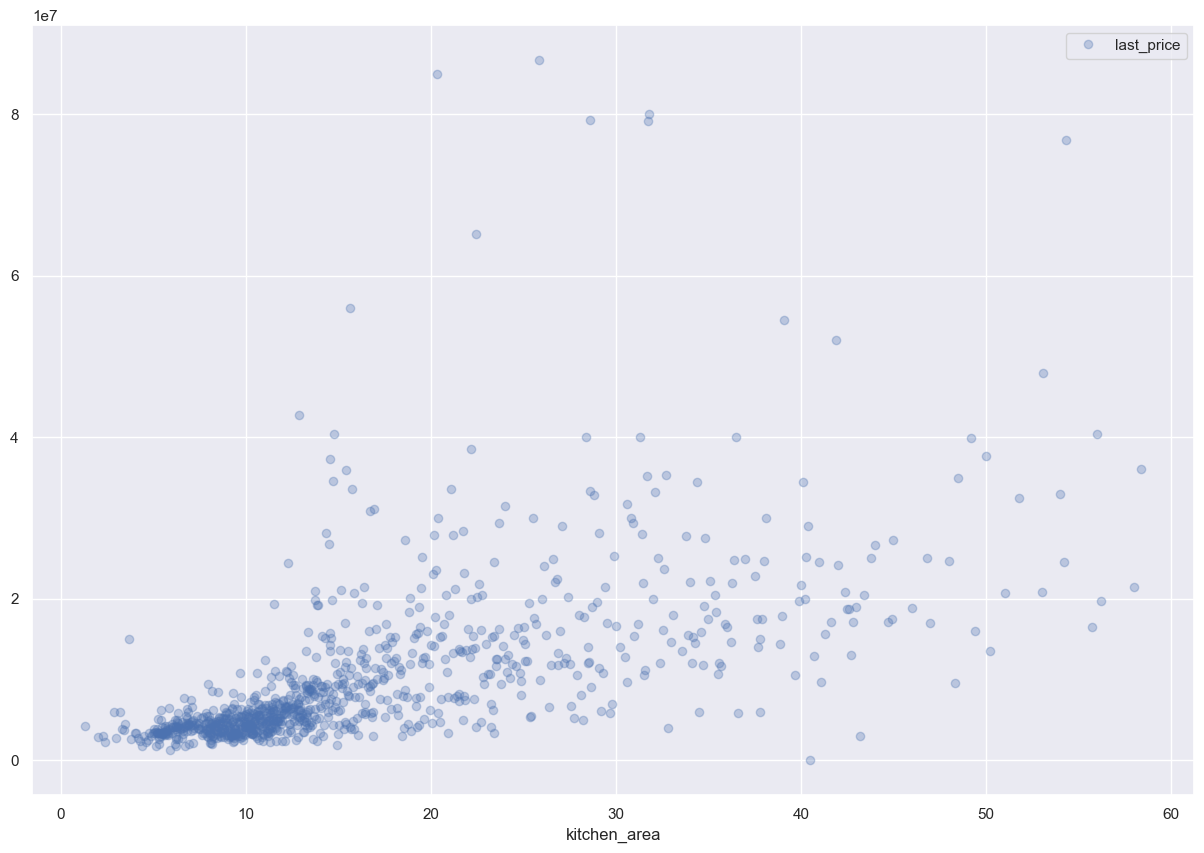

In [195]:
df.pivot_table(index='kitchen_area', values='last_price').plot(style='o', alpha=0.3)
plt.show()

Площдь кухни также оказыает влияние на стоимость квартиры

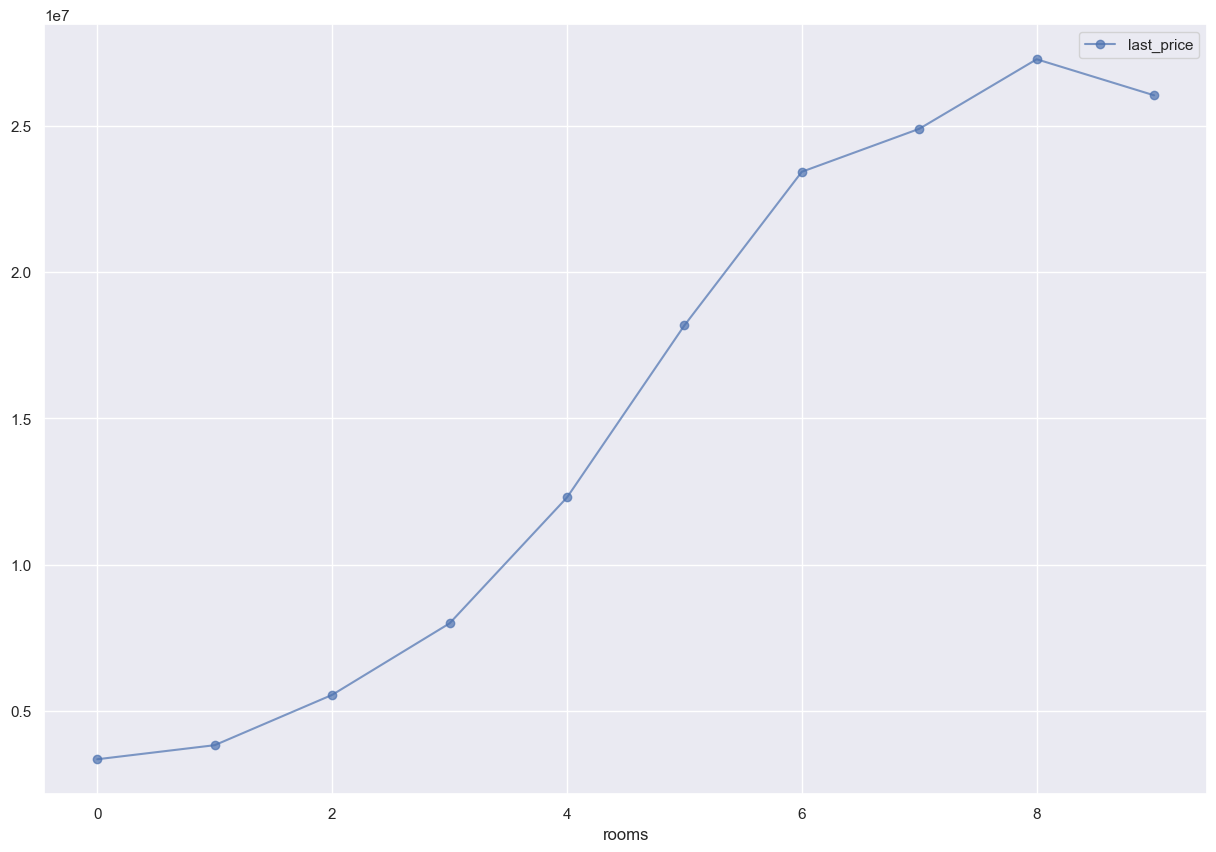

In [197]:
df.pivot_table(index='rooms', values='last_price').plot(style='o-', alpha=0.7)
plt.show()

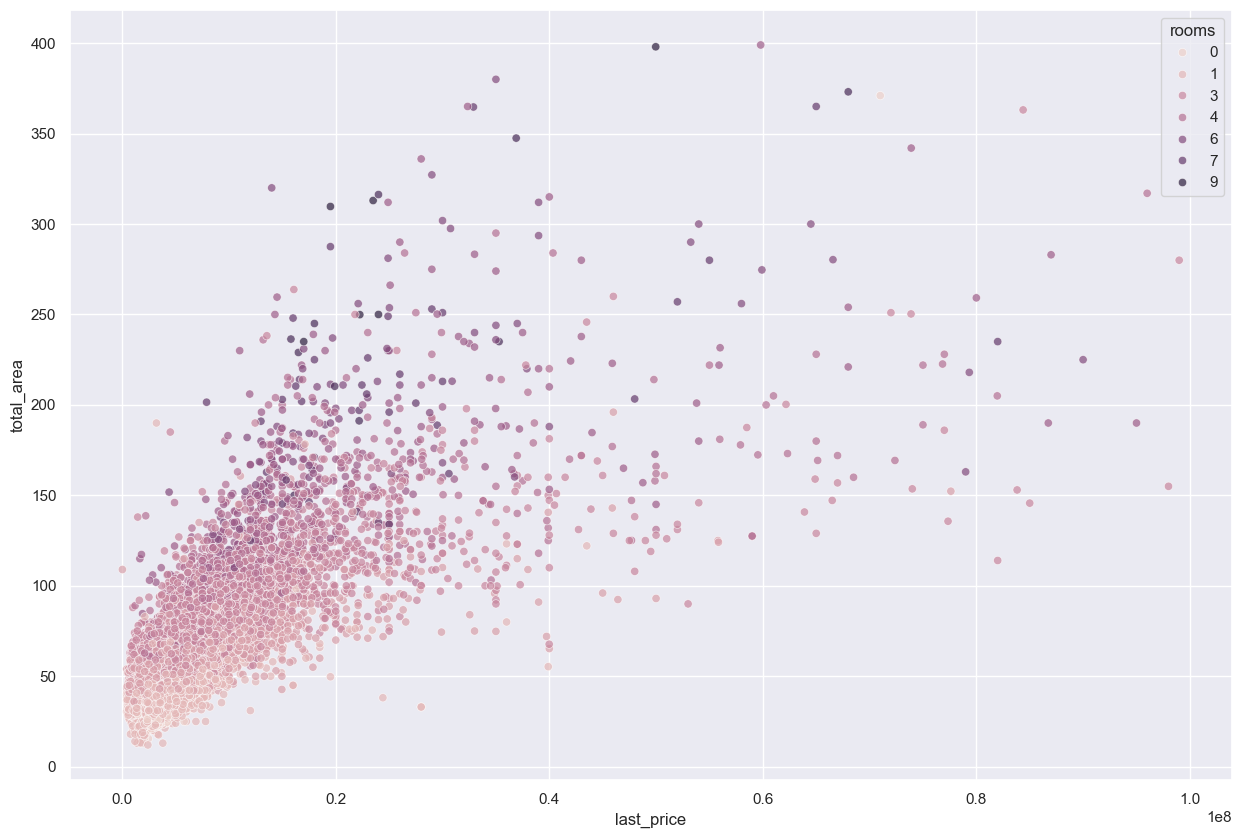

In [202]:
sns.scatterplot(data=df, x='last_price', y='total_area', alpha=0.7, hue='rooms', color='blue')
plt.show()

Можно сказать, что с увеличением числа комнат растёт и стоимость квартир, однако, на втором графике хорошо видно, что увеличение числа комнат больше связано с увеличением общей площади и, как следствие, стоимости. 

- Этаж квартиры

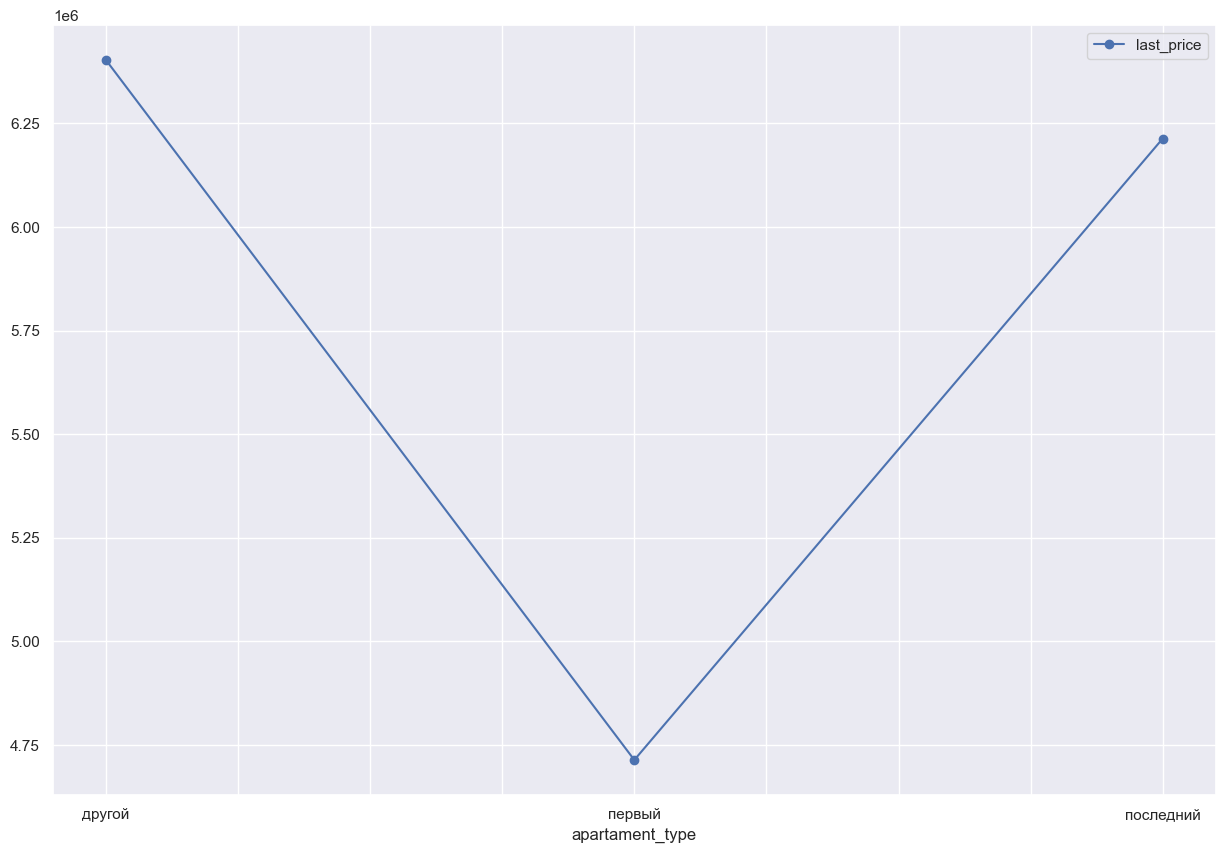

In [206]:
df.pivot_table(index='apartament_type', values='last_price').plot(style='o-')
plt.show()

Квариры расположенные на первом этаже дешевле остальных

- Даты размещения (день недели, месяц, год)

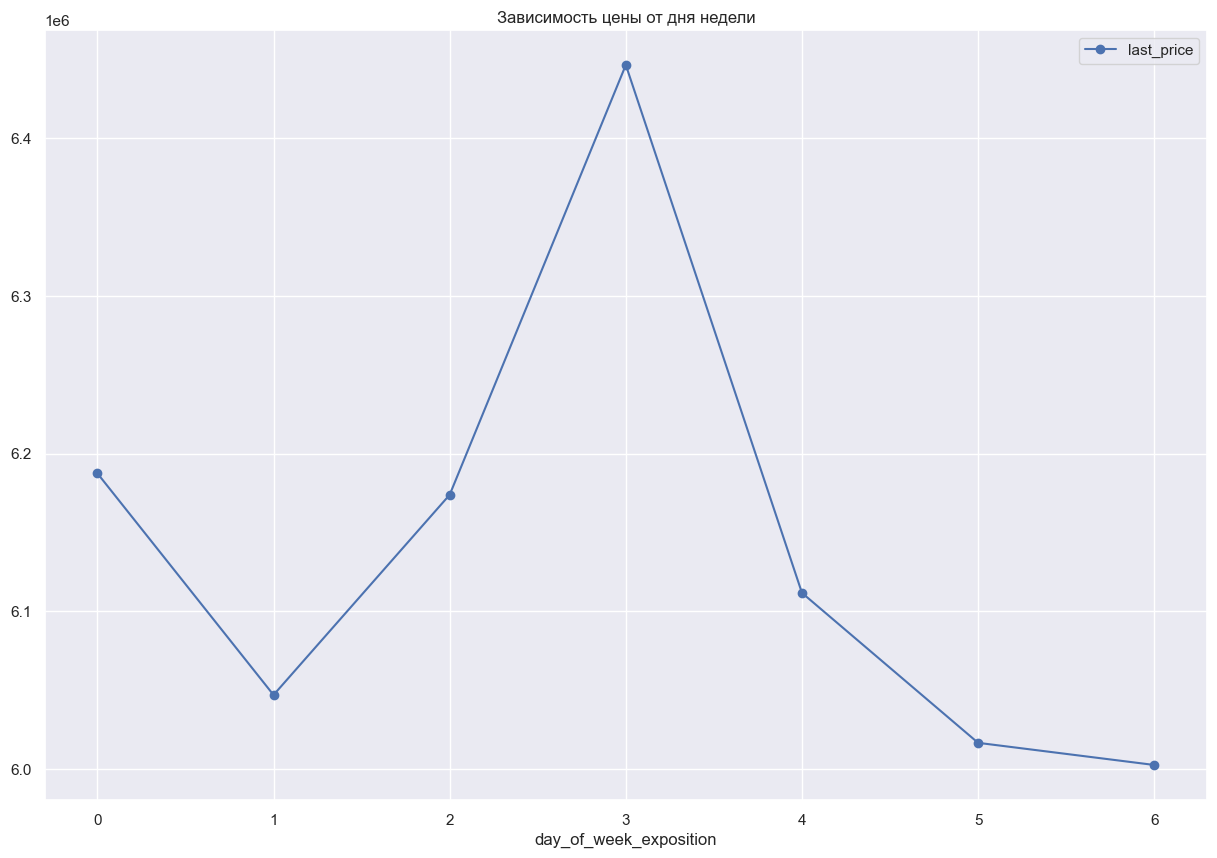

In [208]:
df.pivot_table(index='day_of_week_exposition', values='last_price').plot(style='o-', title='Зависимость цены от дня недели')
plt.show()

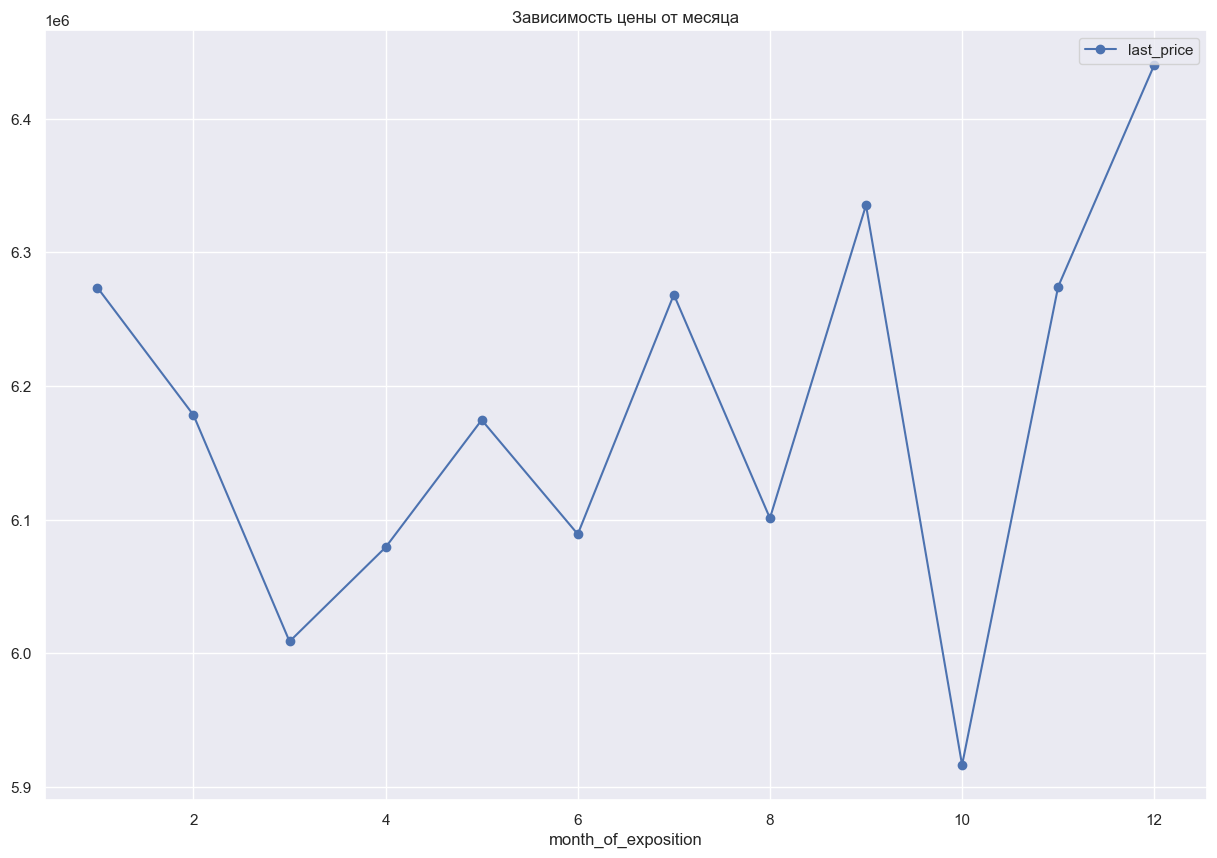

In [211]:
df.pivot_table(index='month_of_exposition', values='last_price').plot(style='o-', title='Зависимость цены от месяца')
plt.show()

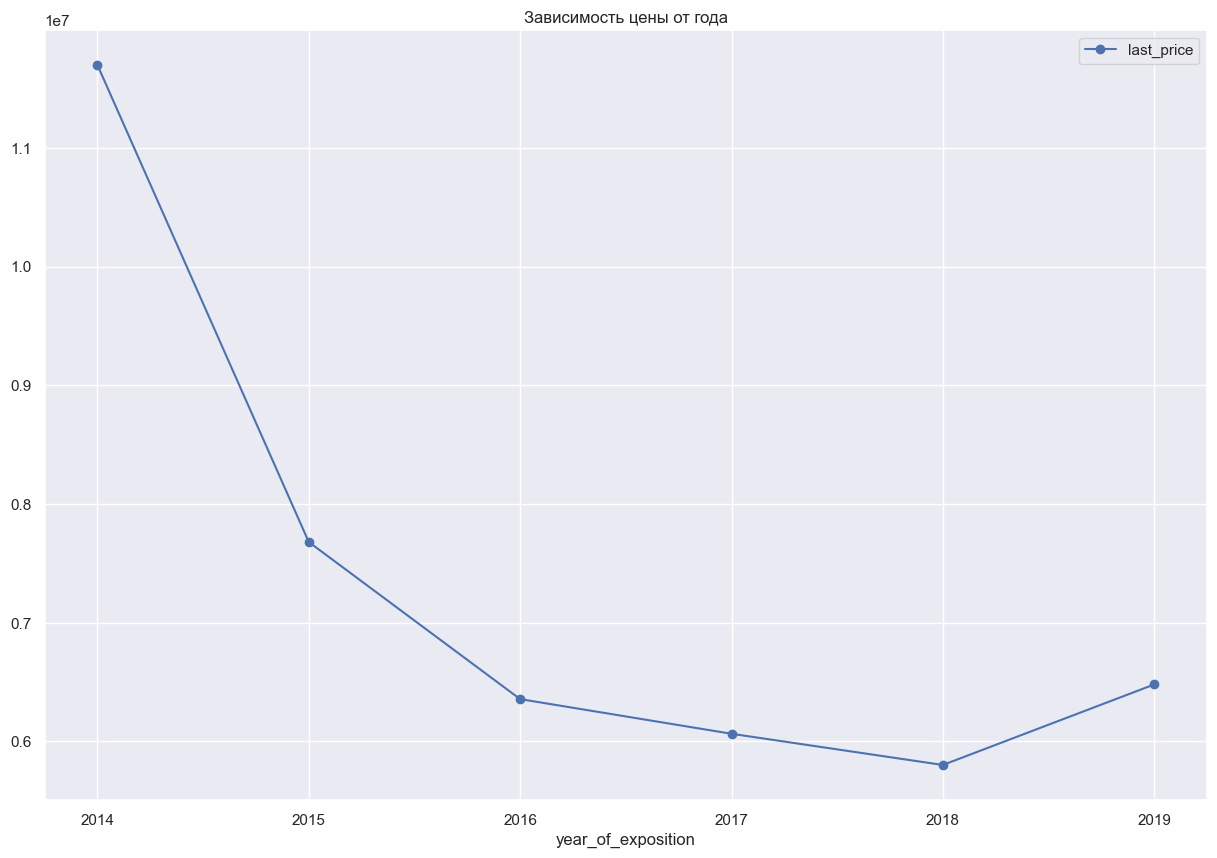

In [214]:
df.pivot_table(index='year_of_exposition', values='last_price').plot(style='o-', title='Зависимость цены от года')
plt.show()

Как и было видно на корреляционной тепловой карте, нет зависимости стоимости от временных показателей. В то же время годовой график показывает, что стоимость на недвижимость неуклонно падала до 2018 года, а затем начала расти.

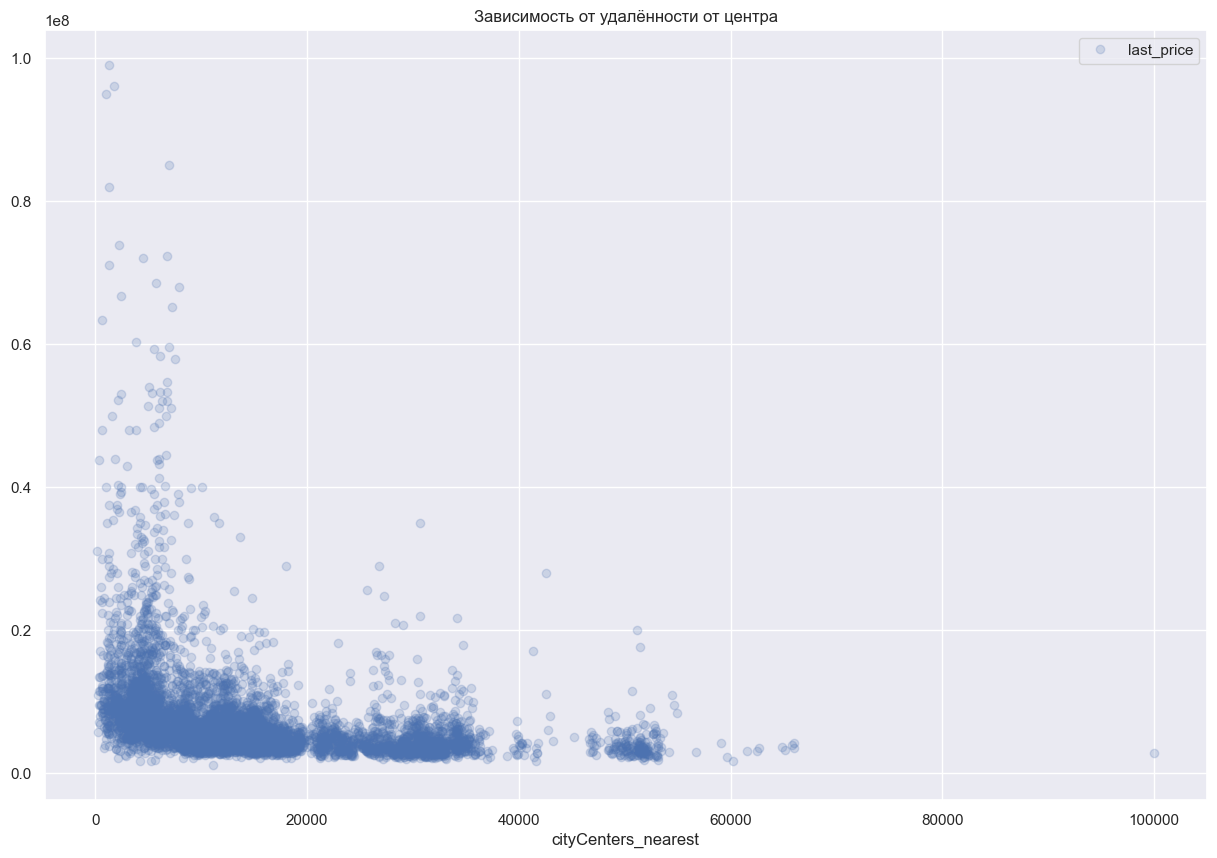

In [218]:
df.pivot_table(index='cityCenters_nearest', values='last_price').plot(style='o', title='Зависимость от удалённости от центра', alpha=0.2)
plt.show()

In [221]:
df.query('cityCenters_nearest < 10000 and last_price < 2000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,apartament_type,ratio_living_total_area,ratio_kitchen_total_area
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,503.0,8.0,111.834862,2,3,2019,последний,0.293578,0.371560
10208,3,1900000.0,17.0,2018-08-14,1,2.75,4,13.0,2,False,...,0,503.0,7.0,111764.705882,1,8,2018,другой,0.764706,0.176471
17753,12,1800000.0,117.3,2016-02-18,5,2.65,4,23.6,2,False,...,0,503.0,139.0,15345.268542,3,2,2016,другой,0.201194,0.109974
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5,17.6,2,False,...,0,503.0,24.0,142307.692308,0,3,2019,другой,1.353846,0.700000
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5,17.6,1,False,...,1,155.0,19.0,127727.272727,0,12,2018,первый,1.333333,0.689394
23394,10,1600000.0,92.0,2018-07-10,3,3.00,6,13.0,1,False,...,3,167.0,3.0,17391.304348,1,7,2018,первый,0.141304,0.108696


## Исследование населённых пунктов с наибольшим числом объявлений

[к навигации](#Навигация)

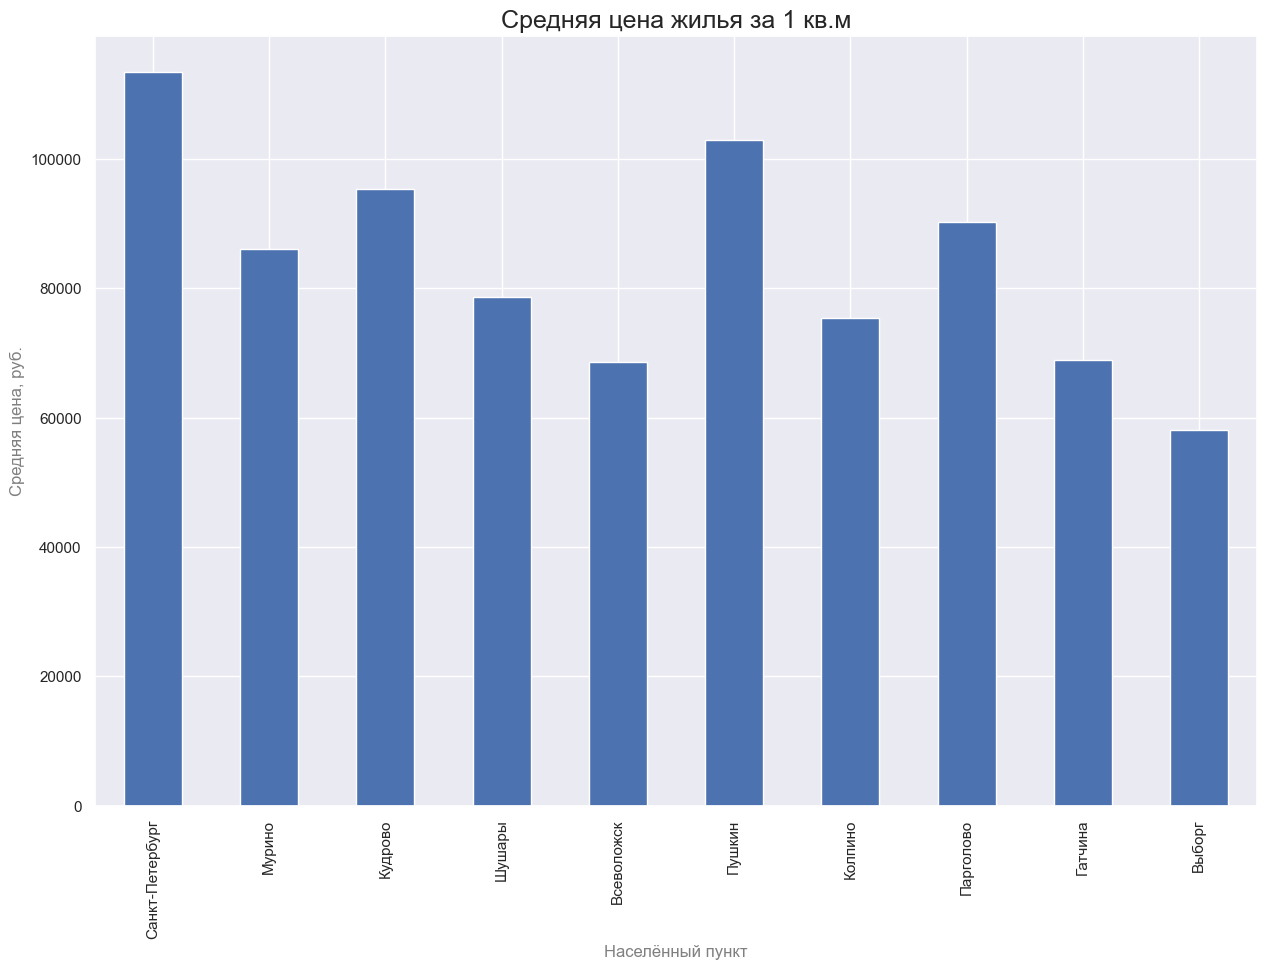

,count,mean
locality_name,,
Санкт-Петербург,15628,113375.767649
Мурино,586,86090.922650
Кудрово,472,95324.930544
Шушары,438,78650.902866
Всеволожск,398,68654.473986
Пушкин,365,102900.024689
Колпино,337,75445.071859
Парголово,327,90175.913458
Гатчина,305,68947.384358


In [274]:
top10 = top10 = df.loc[df['locality_name']
        .isin(df['locality_name']
        .value_counts()[:10].index)] \
        .pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
# top10 = df['locality_name'].value_counts()[:10]
top10 = df.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])
top10.columns=['count', 'mean']
top10 = top10.sort_values('count', ascending=False)[:10]

top10['mean'].plot(kind='bar')
plt.title('Средняя цена жилья за 1 кв.м', fontsize=18)
plt.xlabel('Населённый пункт', color='gray')
plt.ylabel('Средняя цена, руб.', color='gray')
plt.show()
# выведем сводную таблицу
display(top10)

Самая высокая стоимость жилья, ожидаемо, в самом Санкт-Петербурге (113 394 руб./м2), из пригородов самое дорогое жильё оказалось в Пушкине (102 900  руб./м2). Самое дешёвое жильё из популярных пригородов в городе Выборг - 58'142 руб./м2.

In [294]:
# Добавим столбец с расстоянием от центра города в километрах
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).astype('int64', errors='ignore')

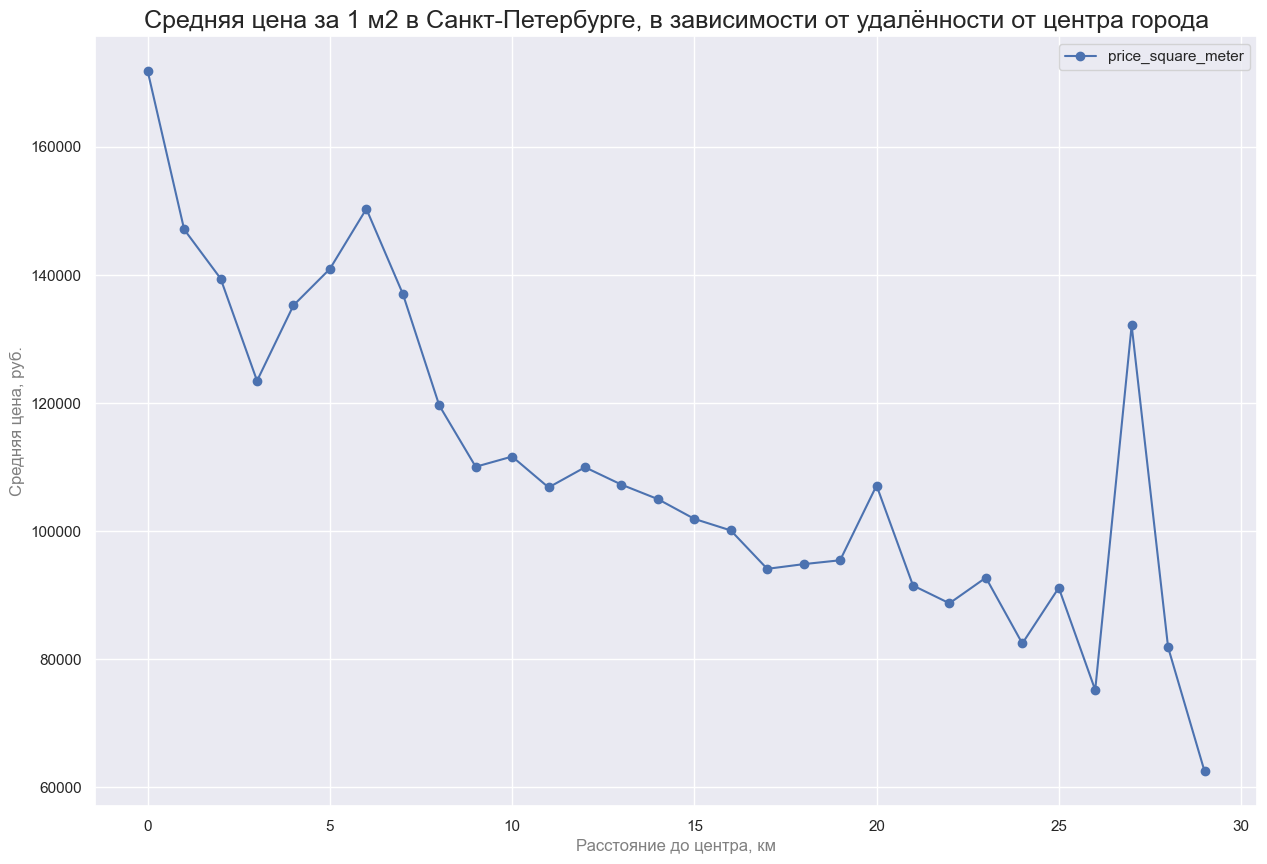

In [296]:
# создадим сводную таблицу для Санкт-Петербурга, в которой для каждого километра удаления от центра 
# расчитаем среднюю стоимость квадратного метра жилья
meter_from_center = df.query('locality_name == "Санкт-Петербург"').pivot_table(
                                                        index='cityCenters_nearest_km',
                                                        values='price_square_meter',
                                                        aggfunc='mean')
# # выведем данные сводной таблицы sp_city на график
meter_from_center.plot(kind='line', style='o-')
plt.title('Средняя цена за 1 м2 в Санкт-Петербурге, в зависимости от удалённости от центра города', fontsize=18)
plt.xlabel('Расстояние до центра, км', color='gray')
plt.ylabel('Средняя цена, руб.', color='gray')
plt.show()

Чем дальше от центра, тем ниже стоимость жилья. Но не всё так однозначно - как видно на графике есть некоторые значения, которые выбиваются из этой общей тенденции, возможно эти районы престижные или же имеют историческую ценность. 

## Общий вывод

[к навигации](#Навигация)

Целью нашего исследования является подготовка и анализ реальных данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет для дальнейшего построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

В результате нашей работы была проведена предобработка исходных данных, в процессе которой были устранены пропущенные значения в столбцах, исправлены типы данных, изучены и исправлены аномалии и выбросы в данных.
Следующим шагом был проделан исследовательский анализ данных на зависимость параметров и их влияние на стоимость недвижимости.

Так мы выяснили, что основным фактором, влияющим на стоимость жилья является общая площадь, расчитали среднюю стоимость 1 кв.м жилья для **Санкт-Петербурга**, она составила примерно **113 000** *руб./м2* и девяти самых популярных населённых пунктов. Самым недорогим из пользующихся повышенным спросом населённых пунктов оказался город Выборг со стоимостью **58 000** *руб./м2*.

Кроме того, была исследована зависимость стоимости жилья от удалённости до центра города. Чем дальше от центра, тем дешевле жильё, однако, есть на некоторых удалениях от центра аномально высокая стоимость объектов. 

Так же интересным оказался город Мурино с населением 89'636 человек и аномально большим количеством объявлений - 2.5% от общего числа. В данном исследовании не ставилась цель исследование подобных аномалий, но они, безусловно, интересны.